<a href="https://colab.research.google.com/github/WaadAlharthi/ML_Portfolio/blob/main/Cluestering_Analysis_Customers_Segmentation_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

## Tasks

Mentoring Prep. and self study

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [ ]:
df_mall = pd.read_csv("Mall_Customers.csv")
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [ ]:
df_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df_mall = df_mall.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)': 'Score'})
df = df_mall.copy()
df.drop(["CustomerID"], axis = 1, inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





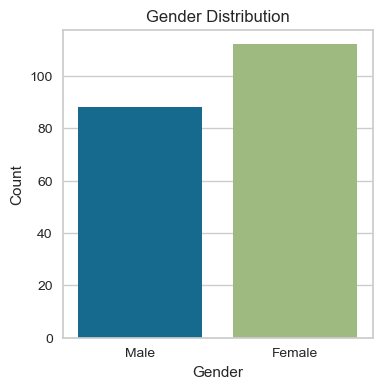

In [ ]:
plt.figure(figsize =(4,4))

sns.countplot(x="Gender", data=df_mall)

# Add labels and a title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

<AxesSubplot:>

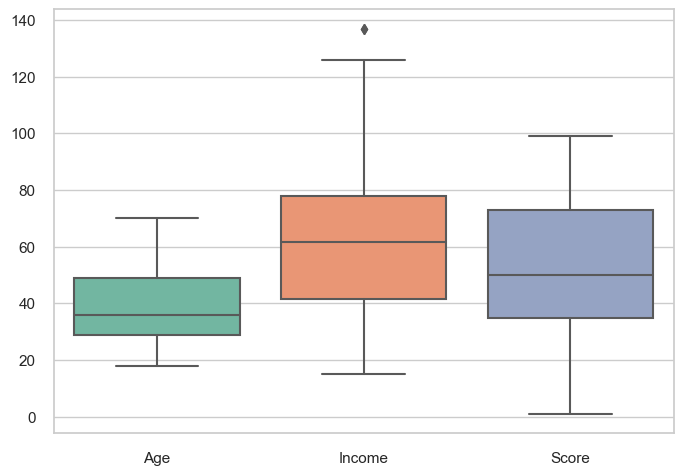

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(data=df, palette="Set2")

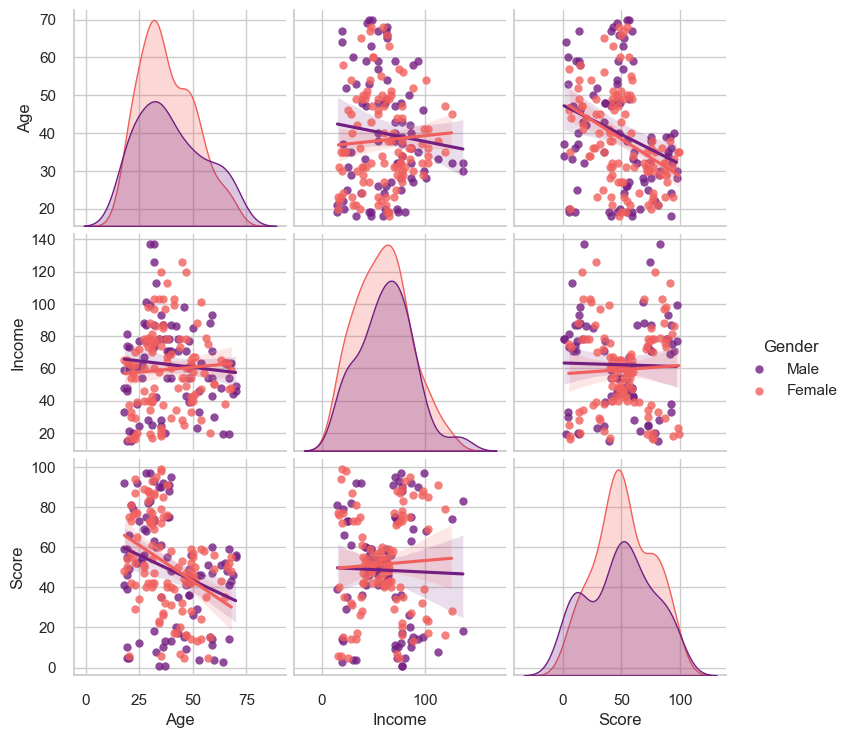

In [ ]:
sns.pairplot(df, kind="reg", hue='Gender', palette="magma")

#### From this pair plot we can guess that there would be five clusters based on the relationship between the annual income and spending score or two clusters based on the relationship between the age and spending score.
#### We can also see that the Gender doesn't provide any beneficial information.

<AxesSubplot:xlabel='Income', ylabel='Score'>

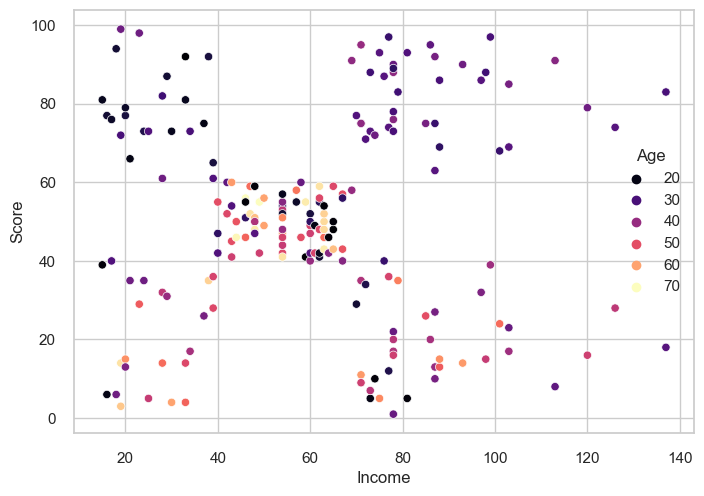

In [ ]:
sns.scatterplot(x="Income", y="Score", hue="Age", data=df, palette="magma")

#### From this scatter plot we can see that all mall customers with high spending score, are under the age of 40 regardless of their income.

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
columns = ['Age','Score']
scaled_data =df[columns]
scaled_data = scaler.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data, columns = ['Age','Score'])

scaled_data.head()

,Age,Score
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


#### Fisrt we will perform the hopkins test on the scaled data

In [ ]:
def hopkins_statistic(data, n):
    """
    Calculate the Hopkins statistic for clustering tendency.

    :param data: The input data (numpy array or pandas DataFrame).
    :param n: The number of random data points for comparison.
    :return: The Hopkins statistic.
    """
    random_data = np.random.rand(n, data.shape[1])

    # Calculate the distance to the nearest neighbor in the actual data
    nn_actual = NearestNeighbors(n_neighbors=1).fit(data)
    ujd = nn_actual.kneighbors(data, 2, return_distance=False)[:, 1]

    # Calculate the distance to the nearest neighbor in the random data
    nn_random = NearestNeighbors(n_neighbors=1).fit(random_data)
    wjd = nn_random.kneighbors(data, 1, return_distance=True)[0]

    # Calculate the Hopkins statistic
    hopkins_stat = sum(ujd) / (sum(ujd) + sum(wjd))
    return hopkins_stat

In [ ]:
hopkins = hopkins_statistic(scaled_data, n=100)
print("Hopkins Statistic on scaled data:", hopkins)


Hopkins Statistic on scaled data: [0.990212]


#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'elbow method')

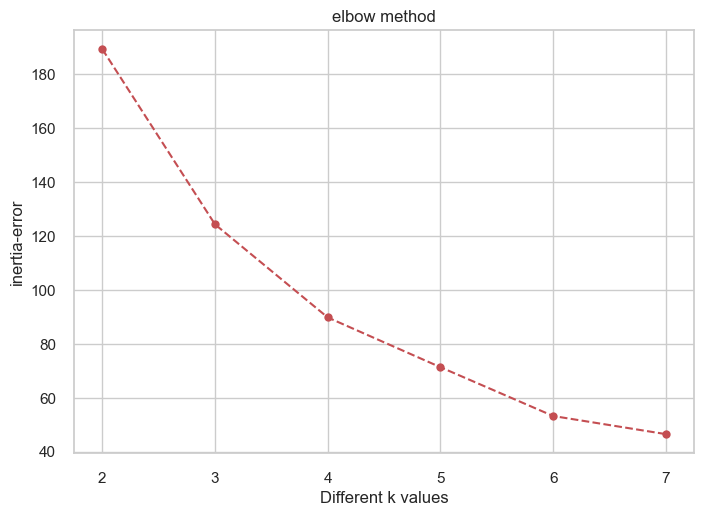

In [ ]:
ssd = []

K = range(2,8)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(scaled_data)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "ro--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [ ]:
K_means_model = KMeans(n_clusters=5,
                       random_state=42)
K_means_model.fit_predict(scaled_data)

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [ ]:
silhouette_score(scaled_data, K_means_model.labels_)

0.44754858878462783

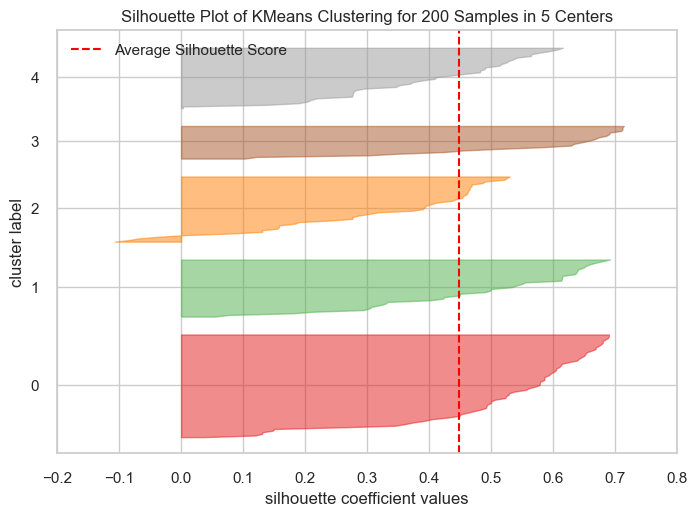

In [ ]:
model = KMeans(n_clusters=5,
                random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_data)
visualizer.poof();

### Why silhouette_score is negative?

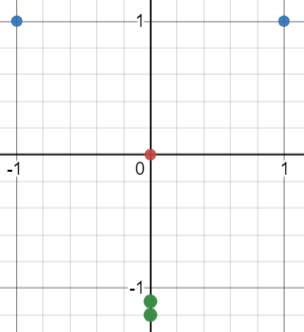

In [ ]:
for i in range(5):
    label = (model.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0      : 0.5189980517852315
mean silhouette score for label 1      : 0.478815940974553
mean silhouette score for label 2      : 0.30627708347487087
mean silhouette score for label 3      : 0.5559830072623717
mean silhouette score for label 4      : 0.39009118401598214
mean silhouette score for all labels : 0.44754858878462783


#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
clusters = K_means_model.labels_

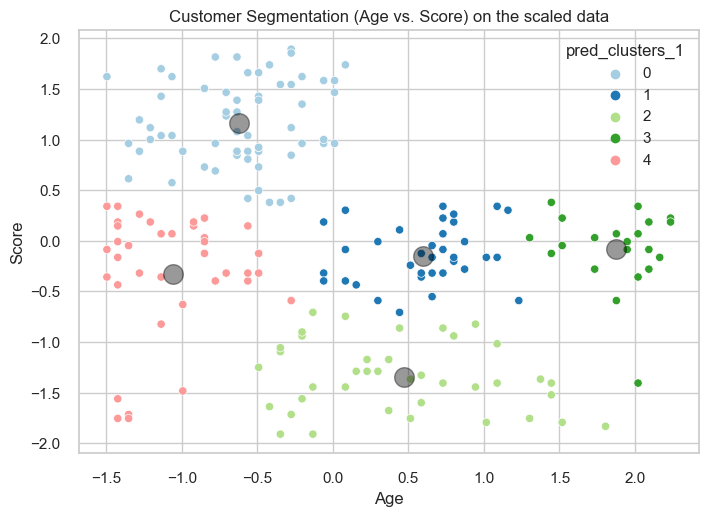

In [ ]:
scaled_data["pred_clusters_1"] = clusters

sns.scatterplot(x="Age", y="Score", hue="pred_clusters_1", data=scaled_data, palette="Paired")

centers = K_means_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.4)

plt.xlabel('Age')
plt.ylabel('Score')
plt.title('Customer Segmentation (Age vs. Score) on the scaled data')
plt.show()

In [ ]:
df["pred_clusters_1"] = clusters
df.head()

,Gender,Age,Income,Score,pred_clusters_1
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


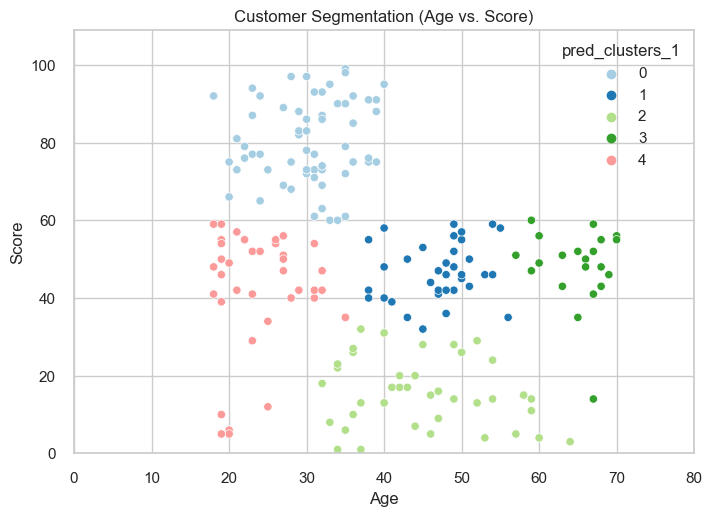

In [ ]:
sns.scatterplot(x="Age", y="Score", hue="pred_clusters_1", data=df, palette="Paired")

plt.xlim(0, df['Age'].max() + 10)  # Set the x-axis limit, adding a buffer of 10 units
plt.ylim(0, df['Score'].max() + 10)

plt.xlabel('Age')
plt.ylabel('Score')
plt.title('Customer Segmentation (Age vs. Score)')
plt.show()

#### Cluster 0 represents young customers with high spending score
#### Cluster 4 represents young customers with low spending score


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
columns = ['Income','Score']
scaled_data =df[columns]
scaled_data = scaler.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data, columns = ['Income','Score'])

scaled_data.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
hopkins = hopkins_statistic(scaled_data, n=100)
print("Hopkins Statistic on scaled data:", hopkins)

Hopkins Statistic on scaled data: [0.9912687]


#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'elbow method')

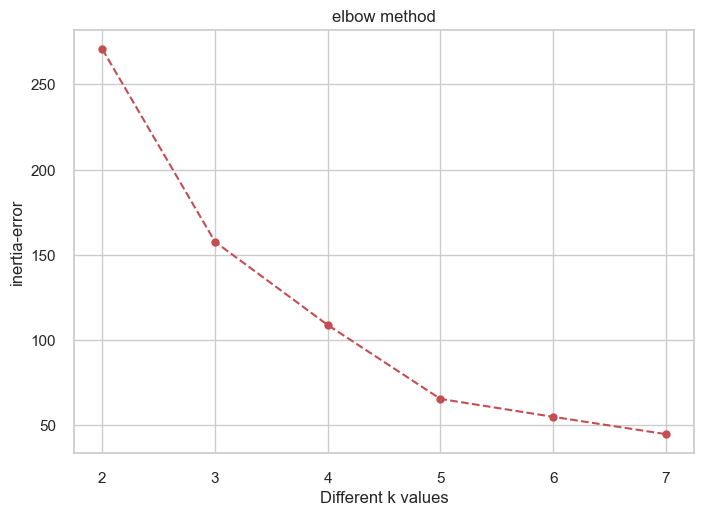

In [ ]:
ssd = []

K = range(2,8)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(scaled_data)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "ro--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [ ]:
K_means_model = KMeans(n_clusters=5, random_state=42)
K_means_model.fit_predict(scaled_data)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [ ]:
silhouette_score(scaled_data, K_means_model.labels_)

0.5546571631111091

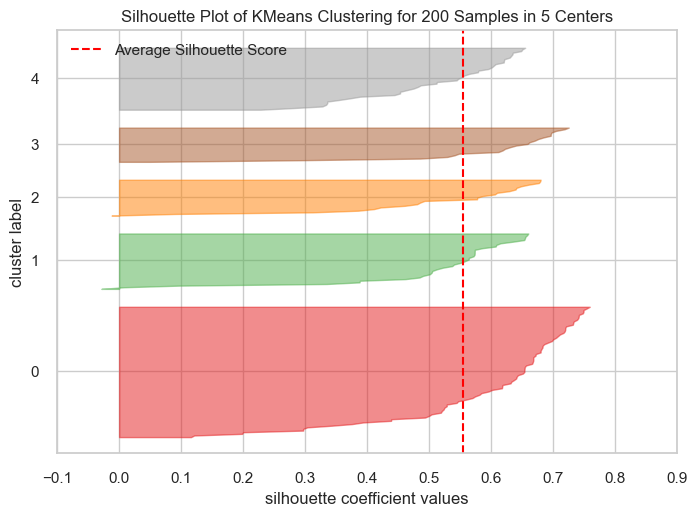

In [ ]:
model = KMeans(n_clusters=5,
                random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_data)
visualizer.poof();

In [ ]:
for i in range(5):
    label = (model.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0      : 0.5978670176450109
mean silhouette score for label 1      : 0.5052153922125491
mean silhouette score for label 2      : 0.5105060797073505
mean silhouette score for label 3      : 0.5982119461245773
mean silhouette score for label 4      : 0.5107528927571015
mean silhouette score for all labels : 0.5546571631111091


#### *iii. Apply K Means*

In [ ]:
clusters = K_means_model.labels_

In [ ]:
scaled_data["pred_clusters_2"] = clusters
scaled_data.head()

,Income,Score,pred_clusters_2
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,2


#### *iv. Visualizing and Labeling All the Clusters*

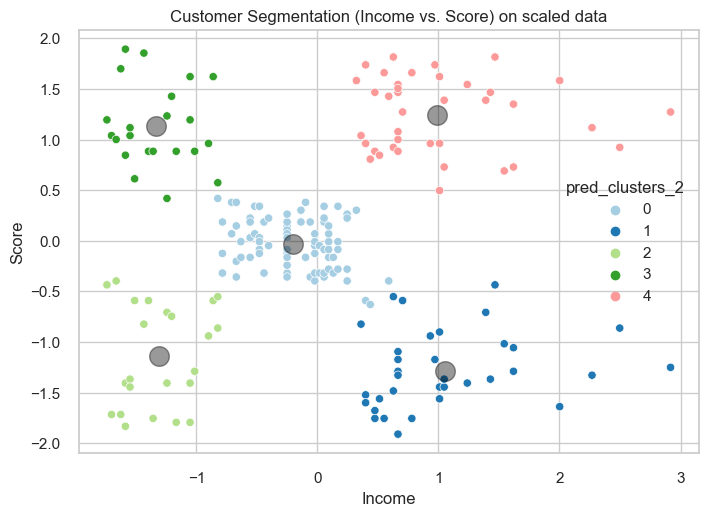

In [ ]:
sns.scatterplot(x="Income", y="Score", hue="pred_clusters_2", data=scaled_data, palette="Paired")

centers = K_means_model.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.4)

plt.xlabel('Income')
plt.ylabel('Score')
plt.title('Customer Segmentation (Income vs. Score) on scaled data')
plt.show()

#### This graph shows more seperation between the clusters than the previous one

In [ ]:
df["pred_clusters_2"] = clusters
df.head()

,Gender,Age,Income,Score,pred_clusters_1,pred_clusters_2
0,Male,19,15,39,4,2
1,Male,21,15,81,0,3
2,Female,20,16,6,4,2
3,Female,23,16,77,0,3
4,Female,31,17,40,4,2


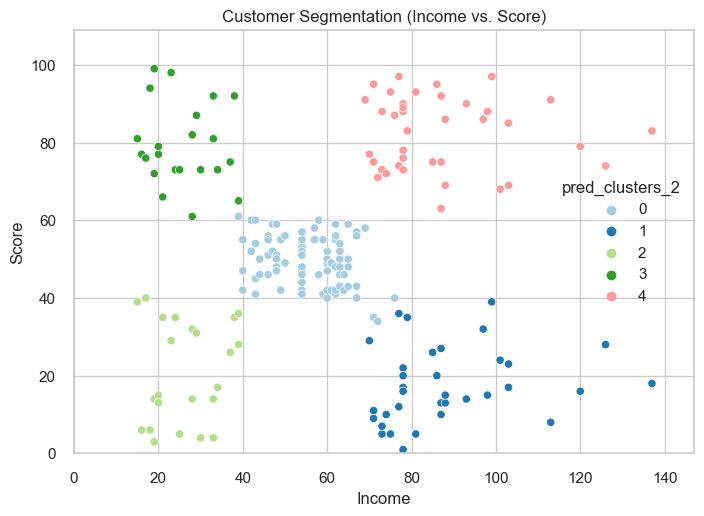

In [ ]:
sns.scatterplot(x="Income", y="Score", hue="pred_clusters_2", data=df, palette="Paired")

plt.xlim(0, df['Income'].max() + 10)  # Set the x-axis limit, adding a buffer of 10 units
plt.ylim(0, df['Score'].max() + 10)

plt.xlabel('Income')
plt.ylabel('Score')
plt.title('Customer Segmentation (Income vs. Score)')
plt.show()

---
---

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [ ]:
X = df.copy()

### Clustering based on Age and Spending Score- x1

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___